<a href="https://colab.research.google.com/github/nudro/classifiers/blob/master/cs231n_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## cs231n - Linear Classifier Case Study

## Generating some data

toy spiral data consists of three classes (blue, red, yellow) that are non-linearly separable

In [0]:
import numpy as np
N = 100 #points per class
D = 2 #dim
K = 3 #num of classes

X = np.zeros((N*K, D)) #data matrix, row is 300 long, 2 cols
y = np.zeros(N*K, dtype='uint8') #class labels

for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N) #radius
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j



In [116]:
X

array([[-0.00000000e+00,  0.00000000e+00],
       [-8.19012039e-04,  1.00677517e-02],
       [-1.27636068e-04,  2.02016170e-02],
       [-6.67776186e-03,  2.95580977e-02],
       [ 1.56336538e-02,  3.72568833e-02],
       [ 9.34659260e-03,  4.96326640e-02],
       [ 1.45826268e-02,  5.88255181e-02],
       [ 1.65968685e-02,  6.87316070e-02],
       [ 2.40144072e-02,  7.71573339e-02],
       [ 2.05822899e-03,  9.08857882e-02],
       [ 6.09602656e-02,  8.05412101e-02],
       [ 4.88250562e-02,  9.98087817e-02],
       [ 8.64461105e-02,  8.49673367e-02],
       [ 5.82303070e-02,  1.17696091e-01],
       [ 8.81609631e-02,  1.10569453e-01],
       [ 9.43313386e-02,  1.18568291e-01],
       [ 7.19652656e-02,  1.44709309e-01],
       [ 6.19817759e-02,  1.60140708e-01],
       [ 1.30722604e-01,  1.26370297e-01],
       [ 1.35932579e-01,  1.35481771e-01],
       [ 1.46111876e-01,  1.39511582e-01],
       [ 1.67219264e-01,  1.30511020e-01],
       [ 1.52336332e-01,  1.61791094e-01],
       [ 1.

In [117]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

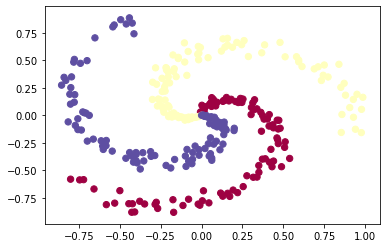

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

## **Random normal distribution - Initialize of Weights and biases**

In [0]:
#initialize parameters randomly 
W = 0.01 * np.random.randn(D,K) #D = dim, K = number of classes (3)
b = np.zeros((1,K))

## **Compute class scores**

Follow linear equation for a neural unit: <br>

$a = W^T*X +b$

In [0]:
scores = np.dot(X,W) + b #multiple [300,2] dot product [2,3] = scores shape [300,3]

In [73]:
scores.shape

(300, 3)

Each row is the class score corresponding to each of the blue, red, yellow classes.

In [74]:
scores[1:2] #the second row, for example

array([[-5.66407405e-05,  3.83784389e-05, -1.29173480e-05]])

In [75]:
scores

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.66407405e-05,  3.83784389e-05, -1.29173480e-05],
       [-1.07226023e-04,  7.16944328e-05, -1.05998931e-05],
       [-1.84412584e-04,  1.27658386e-04, -8.11129835e-05],
       [-1.30461229e-04,  7.65837258e-05,  1.40837263e-04],
       [-2.22477230e-04,  1.42273787e-04,  7.15914870e-05],
       [-2.48821996e-04,  1.56336875e-04,  1.20274804e-04],
       [-2.92594950e-04,  1.84211412e-04,  1.36067240e-04],
       [-3.05638127e-04,  1.87920365e-04,  2.07152234e-04],
       [-4.71240461e-04,  3.13318960e-04, -2.10824000e-05],
       [-1.66844267e-04,  7.03176799e-05,  5.78999181e-04],
       [-3.20054150e-04,  1.80818019e-04,  4.47470950e-04],
       [-8.21492348e-05, -3.42892717e-06,  8.34541122e-04],
       [-3.74635337e-04,  2.10926844e-04,  5.34285099e-04],
       [-2.10082477e-04,  8.08519491e-05,  8.40074178e-04],
       [-2.26159687e-04,  8.74280683e-05,  8.98751008e-04],
       [-4.59050912e-04,  2.58040352e-04

## **Training a Softmax Linear Classifier**

Softmax takes ***logit*** function as input, together this is a cross-entropy loss: 


$L_i = -log(\frac{e^f_{yi}}{\sum e^{f_j}})$

***logit***: 

$e^{log_e(\frac{p}{1-p})}$

convert to probability distribution of the predicted output -> softmax: 

1. logit simplifies to $\frac{p}{1-p} = e^k$, where **k = unnormalized log probabilities**
2. if $e^4 = 54.598$, then $p = (1-p)*54.598$
3. solving ofr p = 0.982
4. if there are three values, $e^4 = 54.6$, $e^2 = 7.39$, $e^-2 = 0.135$, where k's are the unnormalized raw values after the activation, then for each k:<br>
$\frac{e^4}{(e^4 + e^2 + e^-2} = 0.879$<br>
$\frac{e^2}{(e^4 + e^2 + e^-2} = 0.119$<br>
$\frac{e^-2}{(e^4 + e^2 + e^-2} = 0.002$
=> see how they all add up to 1.0. They are now normalized probabilities.



The full Softmax classifier is the average cross-entropy loss over the N training examples and the regularization: 


$L = \frac{1}{N} \sum_i L_i + \frac{1}{2}\lambda \sum_k \sum_l W^2_{k, l}$

Note: $\lambda$ is the regularization parameter "strength"

##**Compute the loss**

Also called the "objective function". Our loss function is the softmax which is the cross-entropy loss.

[logit plot](https://https://www.datavedas.com/wp-content/uploads/2018/04/3.1.1.2.1-Logistic-Regression-1.png)

In [76]:
X.shape

(300, 2)

$L_i = -log(\frac{e^f_{yi}}{\sum e^{f_j}})$

`exp_scores` is the numerator <br>

`probs` are the terms inside the parantheses (numerator / denominator)

In [0]:
num_examples = X.shape[0]

#first, get the unnormalized probs [300,3]
exp_scores = np.exp(scores)

#next, normalize them for each example [300,3]
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


In [78]:
print(exp_scores[:5]) #print the first five unnormalized scores for the first 5 examples

[[1.         1.         1.        ]
 [0.99994336 1.00003838 0.99998708]
 [0.99989278 1.0000717  0.9999894 ]
 [0.9998156  1.00012767 0.99991889]
 [0.99986955 1.00007659 1.00014085]]


In [79]:
probs[:5] #the normalized scores for the same 5 exa - each row sums to 1.0 now

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33331792, 0.33334959, 0.33333249],
       [0.33330272, 0.33336236, 0.33333492],
       [0.33328718, 0.33339121, 0.33332161],
       [0.33328019, 0.3333492 , 0.33337062]])

$L_i = -log(\frac{e^f_{yi}}{\sum e^{f_j}})$

`correct_logprobs` now applies the `-log` to `probs`

In [0]:
correct_logprobs = -np.log(probs[range(num_examples), y])

In [81]:
print("Shape of correct_logprobs is a vector:", correct_logprobs.shape)
print("The first five examples:")
print(correct_logprobs[:5])

Shape of correct_logprobs is a vector: (300,)
The first five examples:
[1.09861229 1.09865854 1.09870414 1.09875075 1.09877174]


## Full Loss
**The full loss is the average of these log probabilities and the regularization loss**

$L = \frac{1}{N} \sum_i L_i + \frac{1}{2}\lambda \sum_k \sum_l W^2_{k, l}$

`data_loss` is the term on the left <br> 
`reg_loss` is the term of the right where `reg` is the lambda parameter.<br>
`loss` is the addition of these two terms

In [0]:
data_loss = np.sum(correct_logprobs)/num_examples 

reg = 0.01
reg_loss = 0.5*reg*np.sum(W*W)

loss = data_loss + reg_loss


In [83]:
loss

1.0987275870651887

##**Computing the Analytic Gradient with Backpropogation**

Now, minimize the loss using gradient descent. Evaluate the gradient (vector of partial derivatives) of the loss function with respect to the parameters W, b and X input. 

Loss for one example: 

p is a vector of normalized probabilities: 

$p_k = \frac{e^{f_k}}{\sum_j e^{f_j}}$

How do the scores inside f(x) change to decrease the loss, Li? Where the f(x) = f(W,X) = Wx + b.

$L_i = -log(p_{y_i})$

So, you need to derive the gradient: $\frac{\partial L_i}{\partial f_k}$

This is asking: "How does the loss for this example change with small changes to the scores computed for this one neuron function (WX + b)?"

$\frac{\partial L_i}{\partial f_k} = p_k - \mathbb{1}(y_i = k)$

Example: `p = [0.2, 0.3, 0.5]` and the correct class is the middle one with the score 0.3. <br>

So then using the above: <br>

`df = [0.2, 0.7, 0.5]` <br>

I guess this means the probability minus 1 only for that specific class, k. So, here the correct class is the 2nd one (green). We ignore the other ones and leave them at 0.2 and 0.5 But for green, we calculate 0.3 - 1.0 = -0.7. <br>

But if the score for the correct class 0.3 increased to 0.8, for example, the `df` would decrease from -0.7 to -0.2.

In [0]:
dscores = probs #normalized probabilities
dscores[range(num_examples), y] -= 1 #means dscores = dscores - 1 iteratively
dscores /= num_examples #means dscores = dscores/num_examples iteratively 

In [85]:
dscores

array([[-0.00222222,  0.00111111,  0.00111111],
       [-0.00222227,  0.00111117,  0.00111111],
       [-0.00222232,  0.00111121,  0.00111112],
       [-0.00222238,  0.0011113 ,  0.00111107],
       [-0.0022224 ,  0.00111116,  0.00111124],
       [-0.00222247,  0.00111127,  0.00111119],
       [-0.00222251,  0.00111127,  0.00111123],
       [-0.00222256,  0.00111131,  0.00111125],
       [-0.00222259,  0.00111129,  0.00111131],
       [-0.00222268,  0.00111153,  0.00111115],
       [-0.00222259,  0.00111101,  0.00111158],
       [-0.00222269,  0.0011112 ,  0.00111149],
       [-0.00222259,  0.00111083,  0.00111176],
       [-0.00222278,  0.00111121,  0.00111157],
       [-0.00222272,  0.00111094,  0.00111178],
       [-0.00222275,  0.00111093,  0.00111183],
       [-0.0022229 ,  0.00111123,  0.00111167],
       [-0.00222299,  0.00111138,  0.00111161],
       [-0.00222277,  0.00111068,  0.00111209],
       [-0.00222281,  0.00111068,  0.00111213],
       [-0.00222282,  0.00111062,  0.001

In [0]:
#backprop on W and b
# I think you need X.T because one example/one row of X is [1, 2], but X needs to be a vector of [2,1]

dW = np.dot(X.T, dscores) #dot product of transpose X (input)*dscores (which is really probs [300,3] matrix)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W #regularization

In [92]:
dW

array([[-0.00036762, -0.00026368,  0.00064656],
       [ 0.00127906, -0.00146875,  0.00022171]])

## **Parameter Update**

In [0]:
step_size = 1e-0 

W += -step_size * dW  #dW = dW + -step_size * dW, iteratively
b += -step_size *db

In [88]:
W

array([[ 0.046451  ,  0.04775162, -0.08346993],
       [-0.09210866,  0.10590122, -0.01598547]])

In [89]:
b

array([[-3.69158055e-05,  3.42693941e-06,  3.34888661e-05]])

## For the entire set of 200 training examples


In [90]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0 #here, step size of 10
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print(i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

0 1.0998302834225624
10 0.9048995359193108
20 0.8318712868556977
30 0.798242593182911
40 0.7805056436157152
50 0.7702841206510395
60 0.7640248212686321
70 0.7600211838291193
80 0.757376022852911
90 0.7555845610307732
100 0.7543475559455971
110 0.753480150634166
120 0.7528643155647822
130 0.752422639624683
140 0.7521032194371998
150 0.7518706121384018
160 0.7517002428786295
170 0.751574852548968
180 0.751482188199708
190 0.7514134709539152


**Evaluate**

In [91]:
scores = np.dot(X,W) + b
predicted_class = np.argmax(scores, axis=1)
print(np.mean(predicted_class == y))

0.54


#cs231n - Neural Network

The data is not linearly separatable, anyway, looking at the plot. Use one hidden layer.

In [0]:
#initialize parameters randomly 

h = 100
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 *np.random.randn(h,K)
b2 = np.zeros((1,K))

In [103]:
W2

array([[ 2.30929153e-03,  1.25992379e-02,  1.36402706e-02],
       [-1.89244567e-02,  1.83534252e-02, -9.21570895e-03],
       [-3.07752773e-03, -6.55113029e-03,  4.11226748e-03],
       [ 1.11811791e-02, -1.65198846e-02, -7.79772547e-04],
       [ 1.50219388e-02, -7.72001511e-03, -5.26524640e-03],
       [ 8.15525748e-04, -5.31254544e-03,  4.62121077e-03],
       [-1.19208657e-02, -1.56293936e-03, -1.29338137e-02],
       [-9.54336101e-04,  6.28831465e-03,  1.64264350e-03],
       [ 1.13561969e-03,  7.55612852e-03,  1.85626496e-02],
       [ 2.44949781e-02, -1.45541940e-02,  1.39786002e-02],
       [-8.70918635e-04, -5.30399375e-04,  1.50618887e-02],
       [-5.06613346e-03, -6.42729870e-03,  4.22790169e-03],
       [-1.50993282e-03, -8.10827541e-05, -1.03862897e-03],
       [-1.07771186e-02,  2.01449415e-03,  9.24049297e-03],
       [ 5.29543103e-03,  4.42274275e-03, -5.66944183e-03],
       [ 4.06804767e-03, -1.71613569e-02, -3.90690779e-03],
       [ 1.47185905e-02, -9.12006401e-03

### **Forward Pass**

In [0]:
hidden_layer = np.maximum(0, np.dot(X,W) + b) #relu activiation
scores = np.dot(hidden_layer, W2) + b2

### **Back Prop**

In [0]:
#backprpo the gradient to the parameters, W2 b2

dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

Hidden layer is a function of other parameters and data. Continue backprop...

In [0]:
dhidden = np.dot(dscores, W2.T)


### Backprop the ReLU: 

since $r = max(0,x)$: 

$\frac{\partial r}{\partial x} = 1(x>0)$ meaning 1 for all positive numbers <br>

Lets gradient pass if x is greater than 0, but kills it otherwise and sets to zero.

In [0]:
dhidden[hidden_layer <=0] = 0

In [108]:
dhidden

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.50218086e-05,  5.30119316e-05,  4.78064888e-06, ...,
         0.00000000e+00,  0.00000000e+00,  3.85174823e-06],
       [ 2.52886783e-05,  5.42134986e-05,  4.60805133e-06, ...,
         0.00000000e+00,  0.00000000e+00,  3.76825860e-06],
       ...,
       [-2.64607964e-06,  6.37559849e-05,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.39893413e-05],
       [-2.94743458e-06,  7.29486596e-05,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.59607980e-05],
       [-2.81246563e-06,  6.92061364e-05,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.51511927e-05]])

In [0]:
#into W,b

dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

### For all 300 examples

Note: that `for i in range(10000)` means that there is a step_size = 1000. So, we will run gradient descent up to 10,000 increments of 1000, or 10. 

In [111]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0 #every step of 1000, it will make a forward and backward pass
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

0 1.0986473012850495
1000 0.30839249863259277
2000 0.2525649219925771
3000 0.24702125127933966
4000 0.24539135996536598
5000 0.24486811773647077
6000 0.24448170707140704
7000 0.24423278422147288
8000 0.24402461960949212
9000 0.24389029716931765


**Evaluate accuracy**

In [113]:
hidden_layer = np.maximum(0, np.dot(X,W) + b)
scores = np.dot(hidden_layer,W2) + b2
predicted_class = np.argmax(scores, axis=1)
print(np.mean(predicted_class ==y))

0.9833333333333333
